# Supervise Learning Model for Classification
# Supervised Learning Capstone Project - Tree Methods Focus - SOLUTIONS



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


------------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.shape

(7032, 21)

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [5]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Anaysise of  The Data

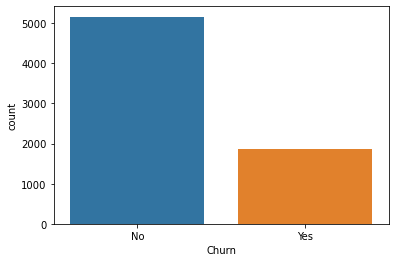

In [9]:
sns.countplot(data=df,x='Churn');

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
print_columns = df.columns.drop(['MonthlyCharges', 'TotalCharges', 'Churn','customerID','tenure'])

In [12]:
len(print_columns)

16

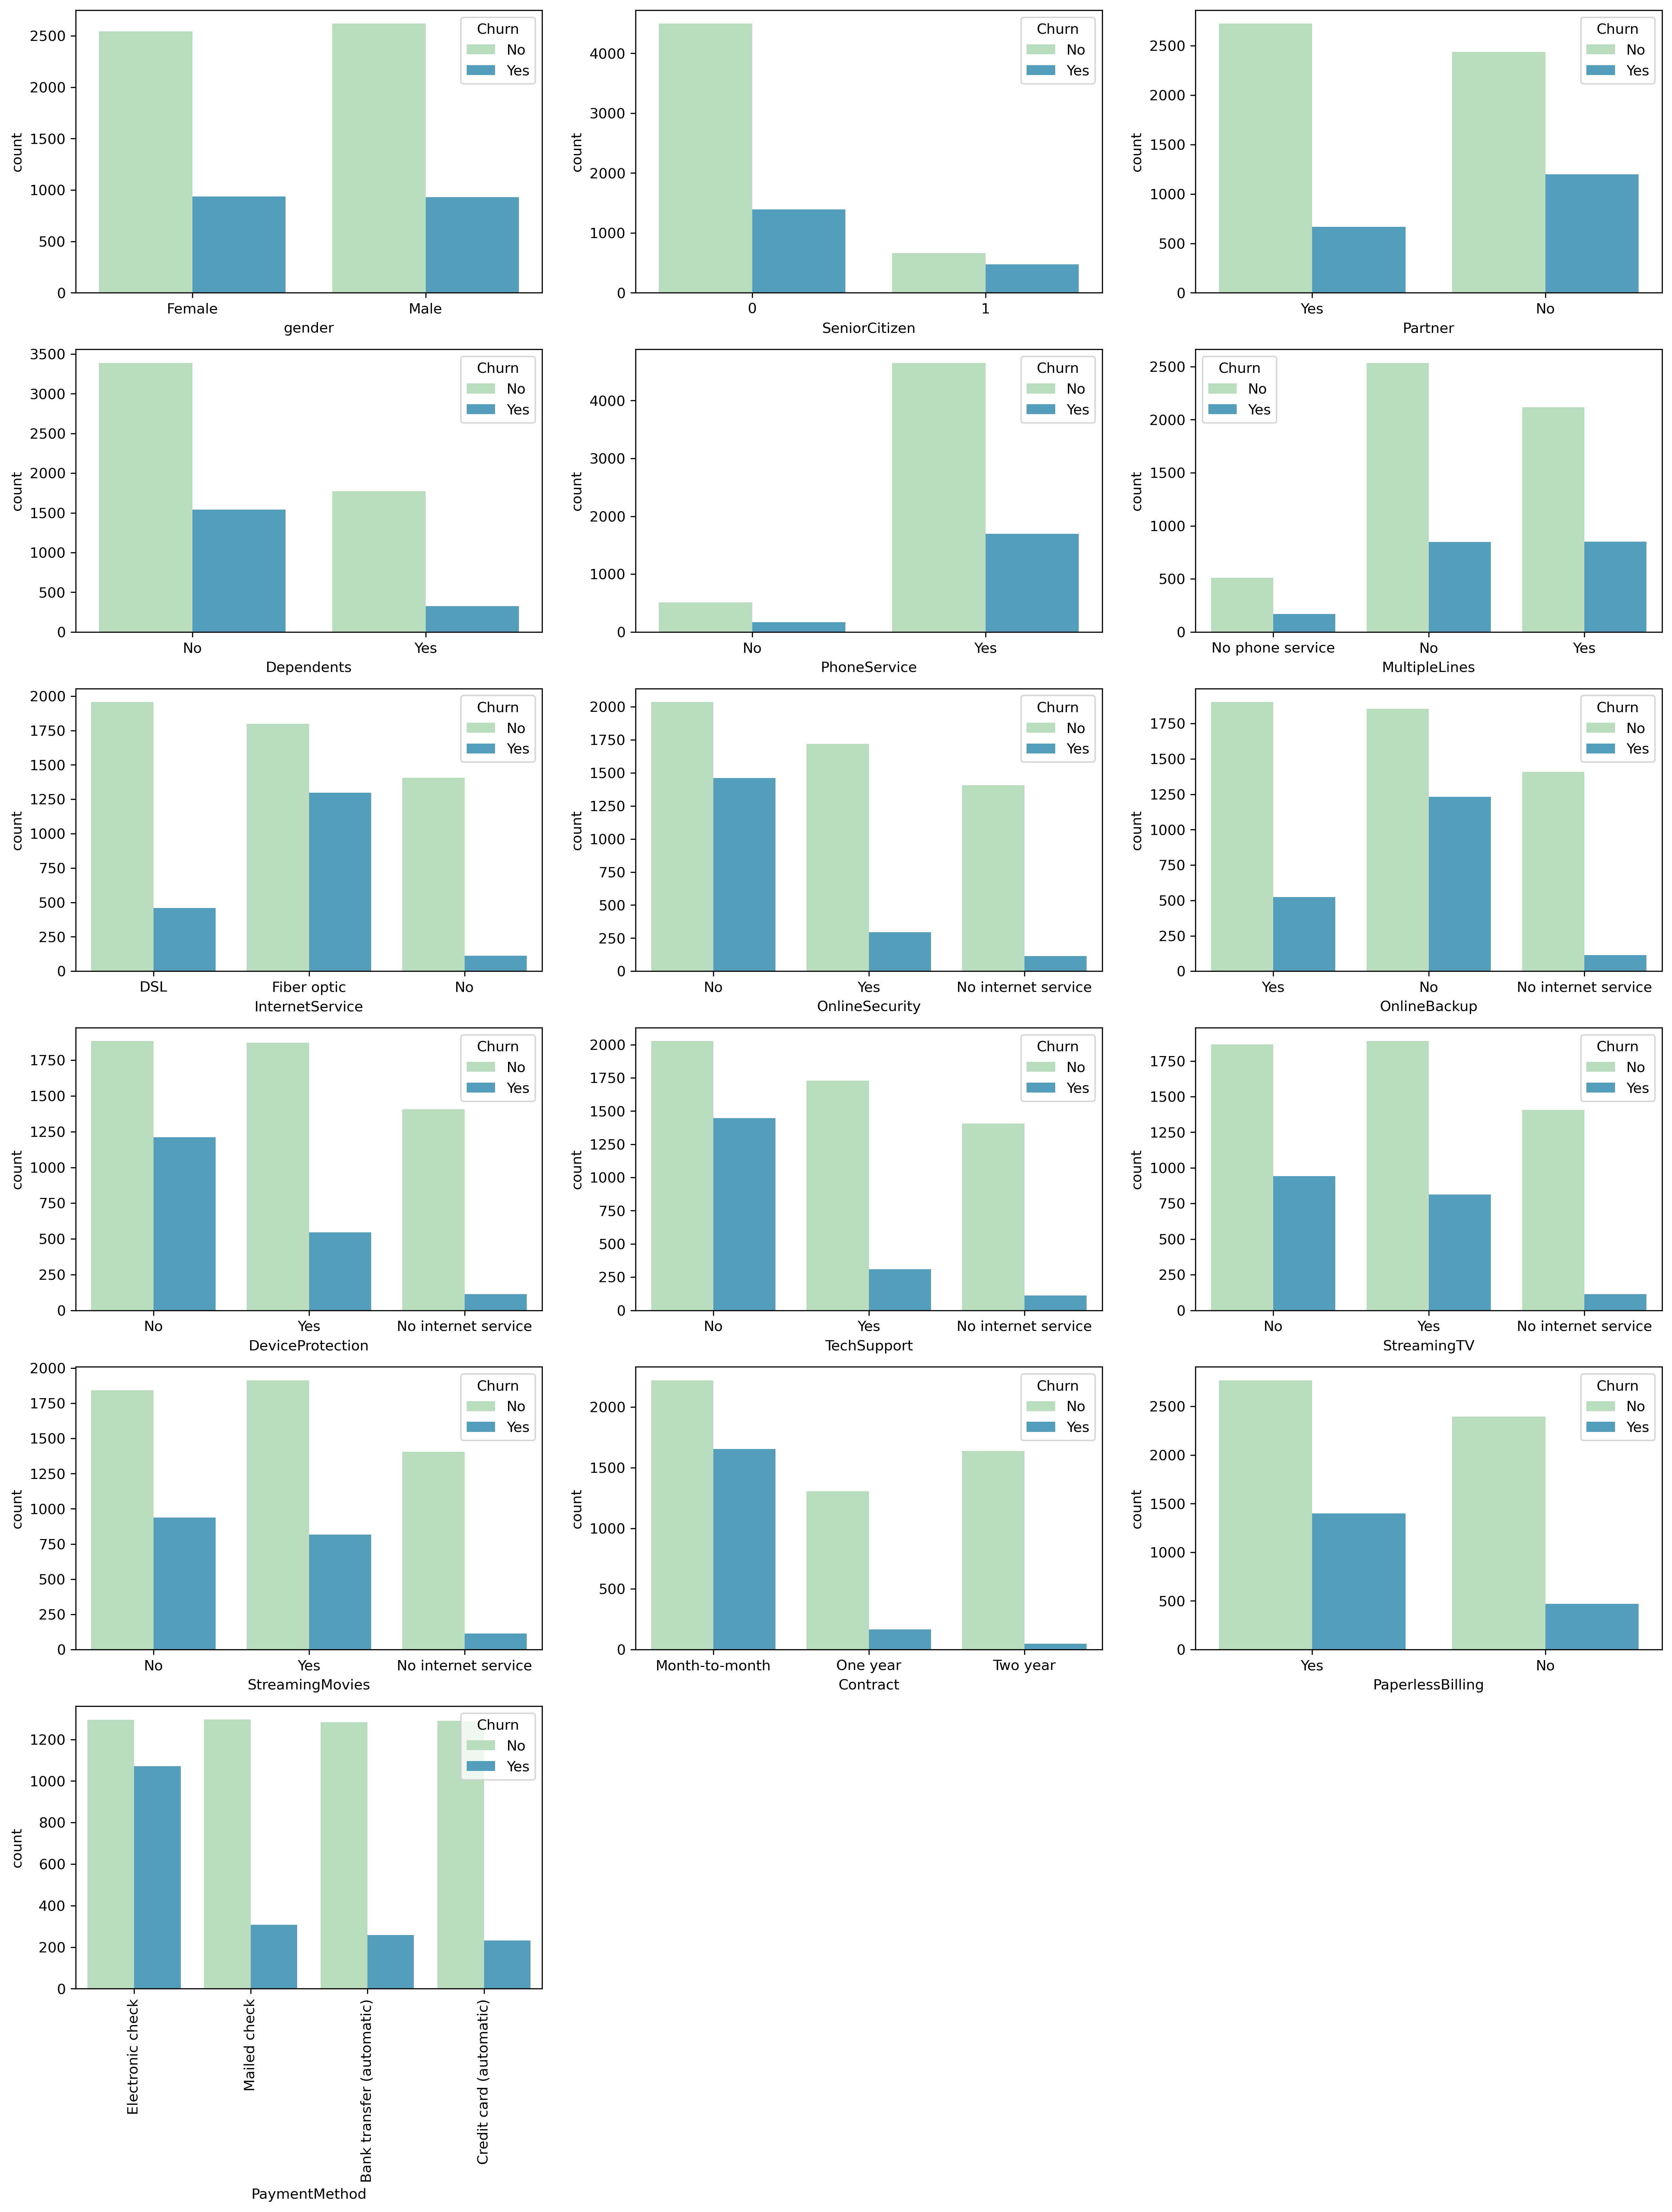

<Figure size 432x288 with 0 Axes>

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=16,figsize=(20,30),dpi=300)
n=1
for i in print_columns:
    if n==16:
        plt.subplot(7,3,n)
        sns.countplot(data=df,x=i,hue='Churn',palette='GnBu')
        plt.xticks(rotation=90)
        n += 1
    else:
        plt.subplot(7,3,n)
        sns.countplot(data=df,x=i,hue='Churn',palette='GnBu')
        n += 1
plt.show()
plt.tight_layout()

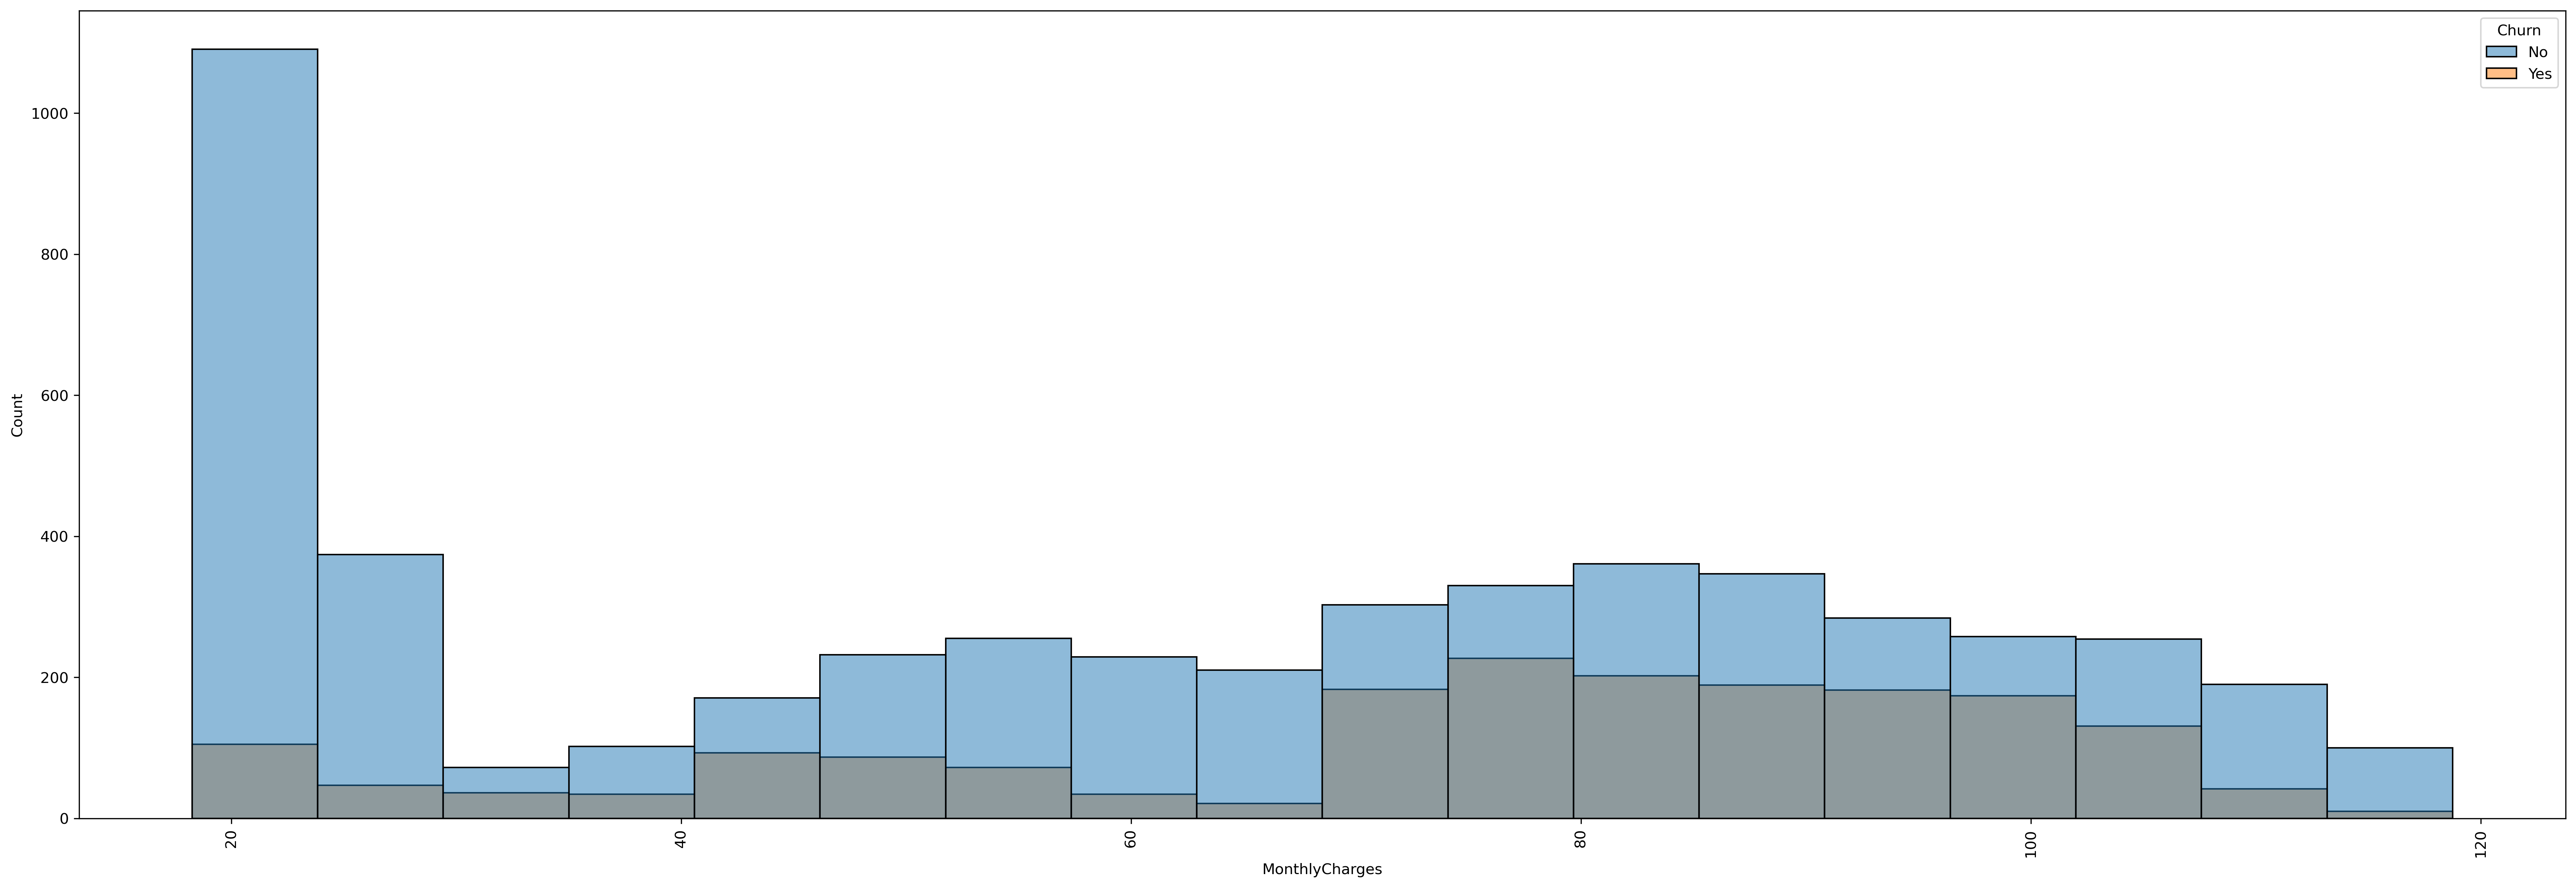

In [14]:
plt.figure(figsize=(30,10),dpi=300)
sns.histplot(data=df, x ='MonthlyCharges',hue='Churn')
plt.xticks(rotation=90);

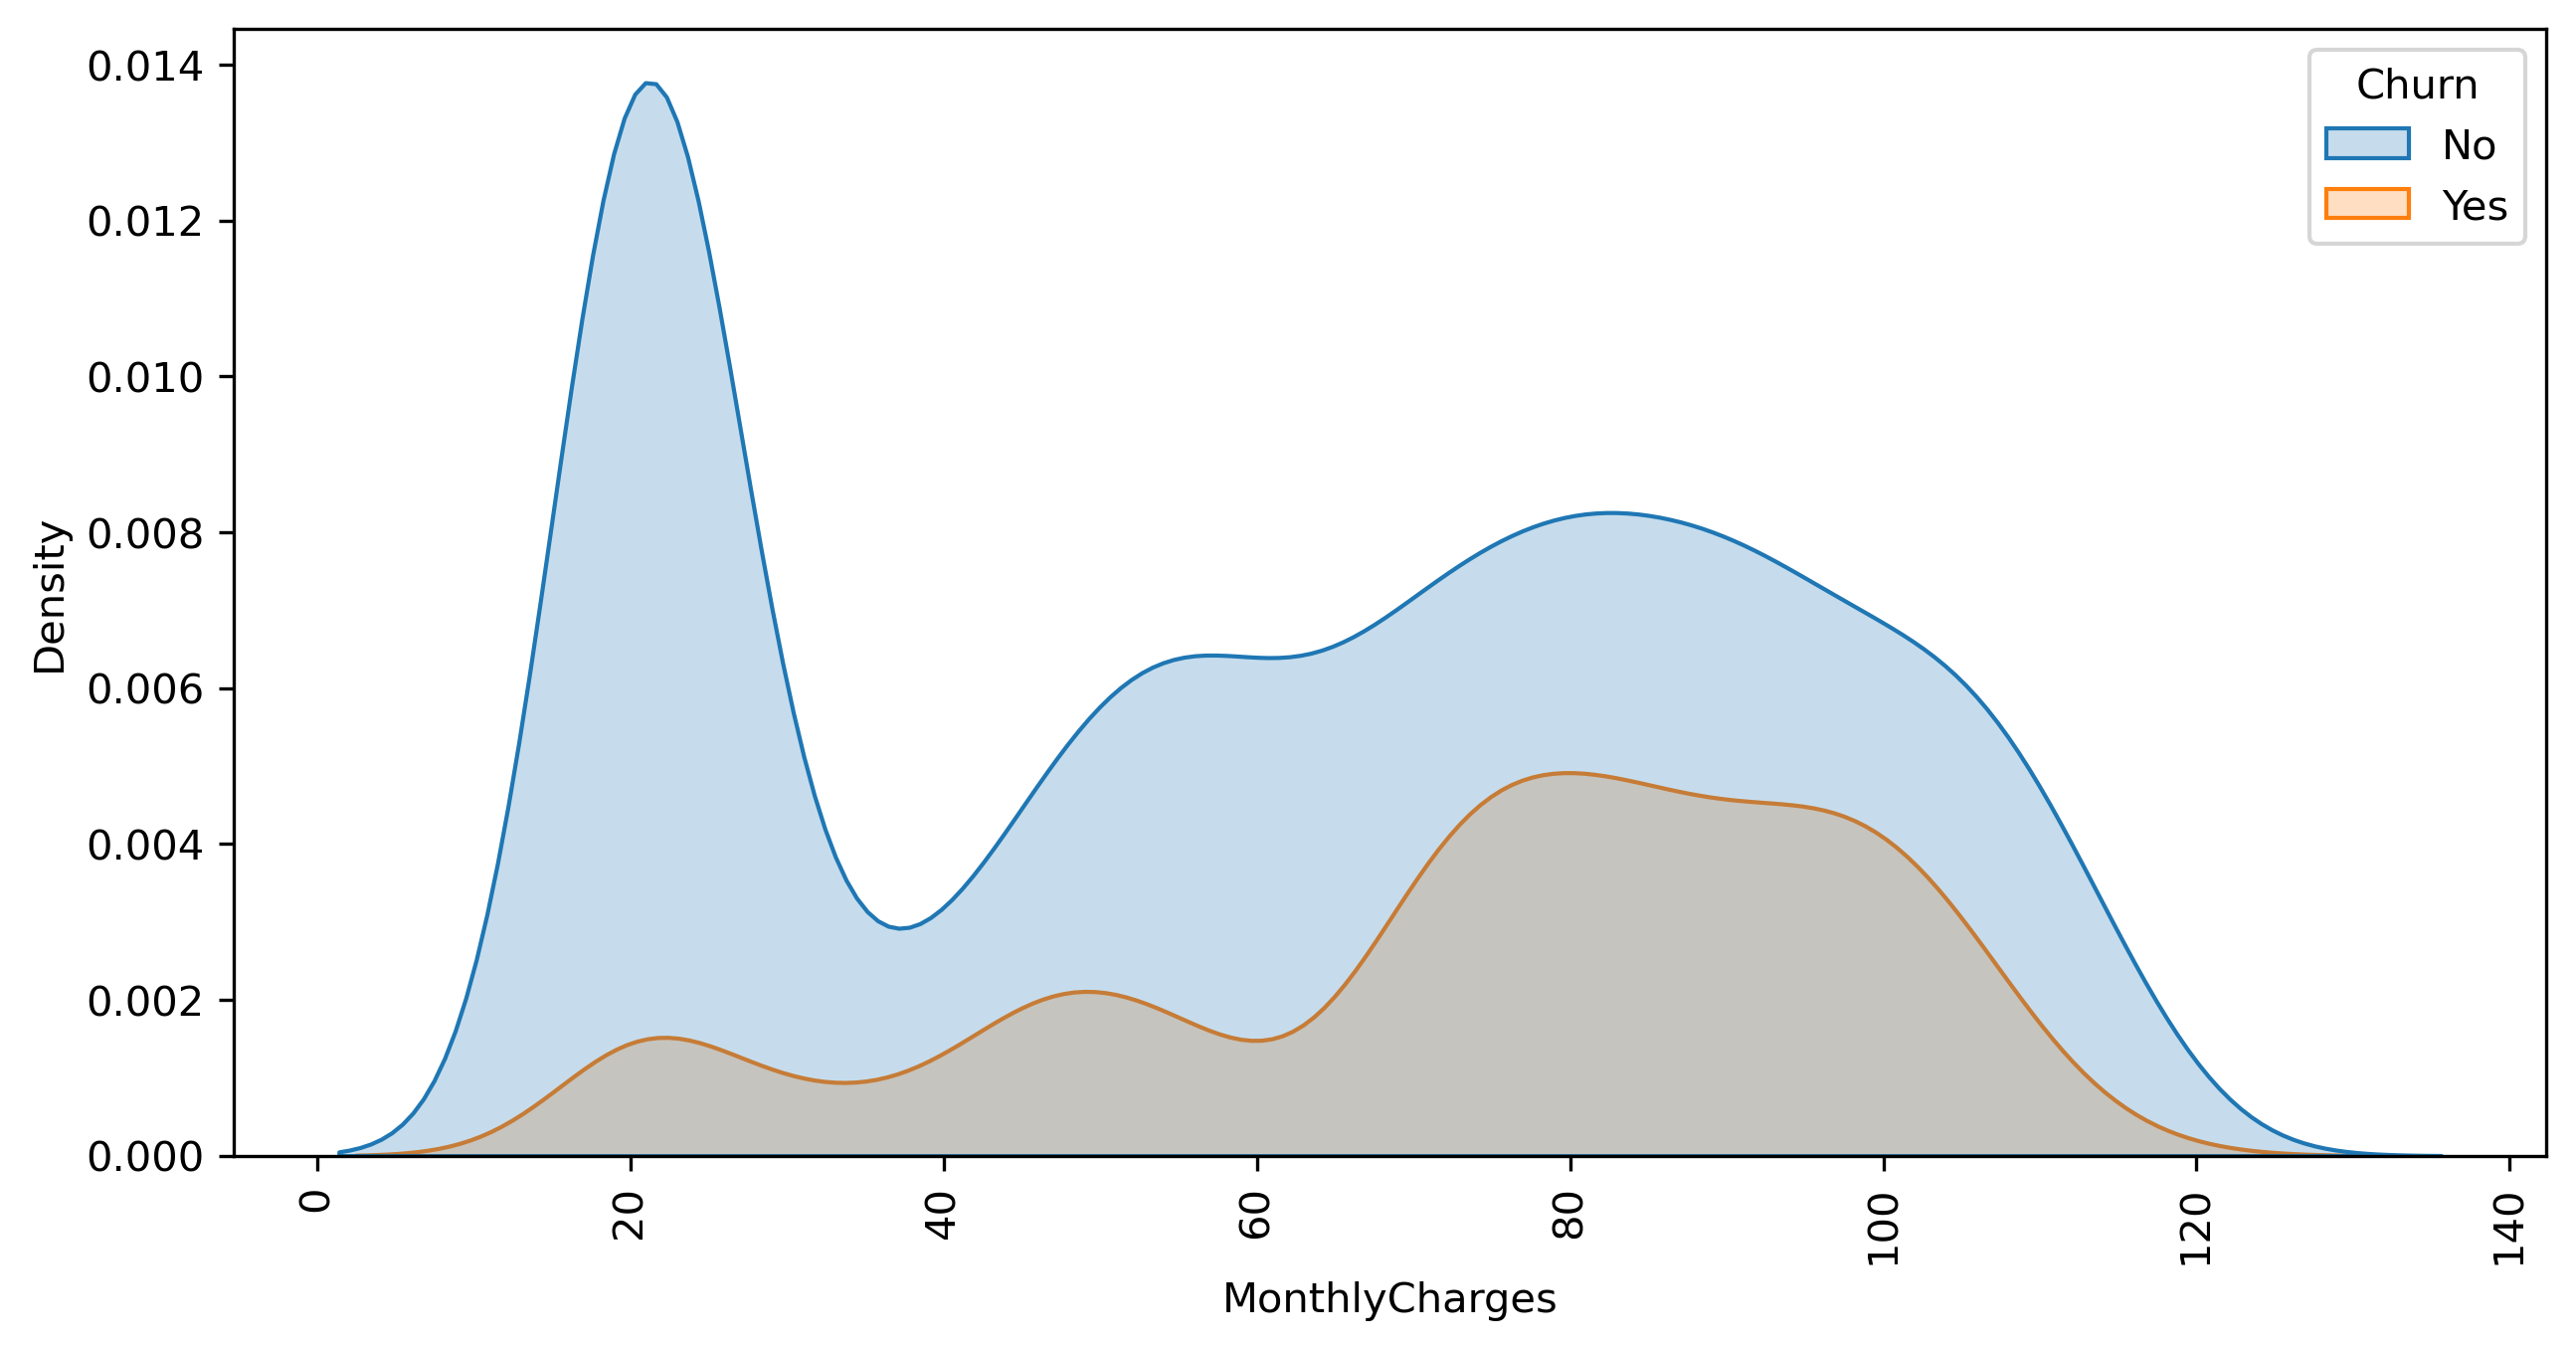

In [15]:
plt.figure(figsize=(10,5),dpi=300)
sns.kdeplot(data=df, x ='MonthlyCharges',hue='Churn',fill=True)
plt.xticks(rotation=90);

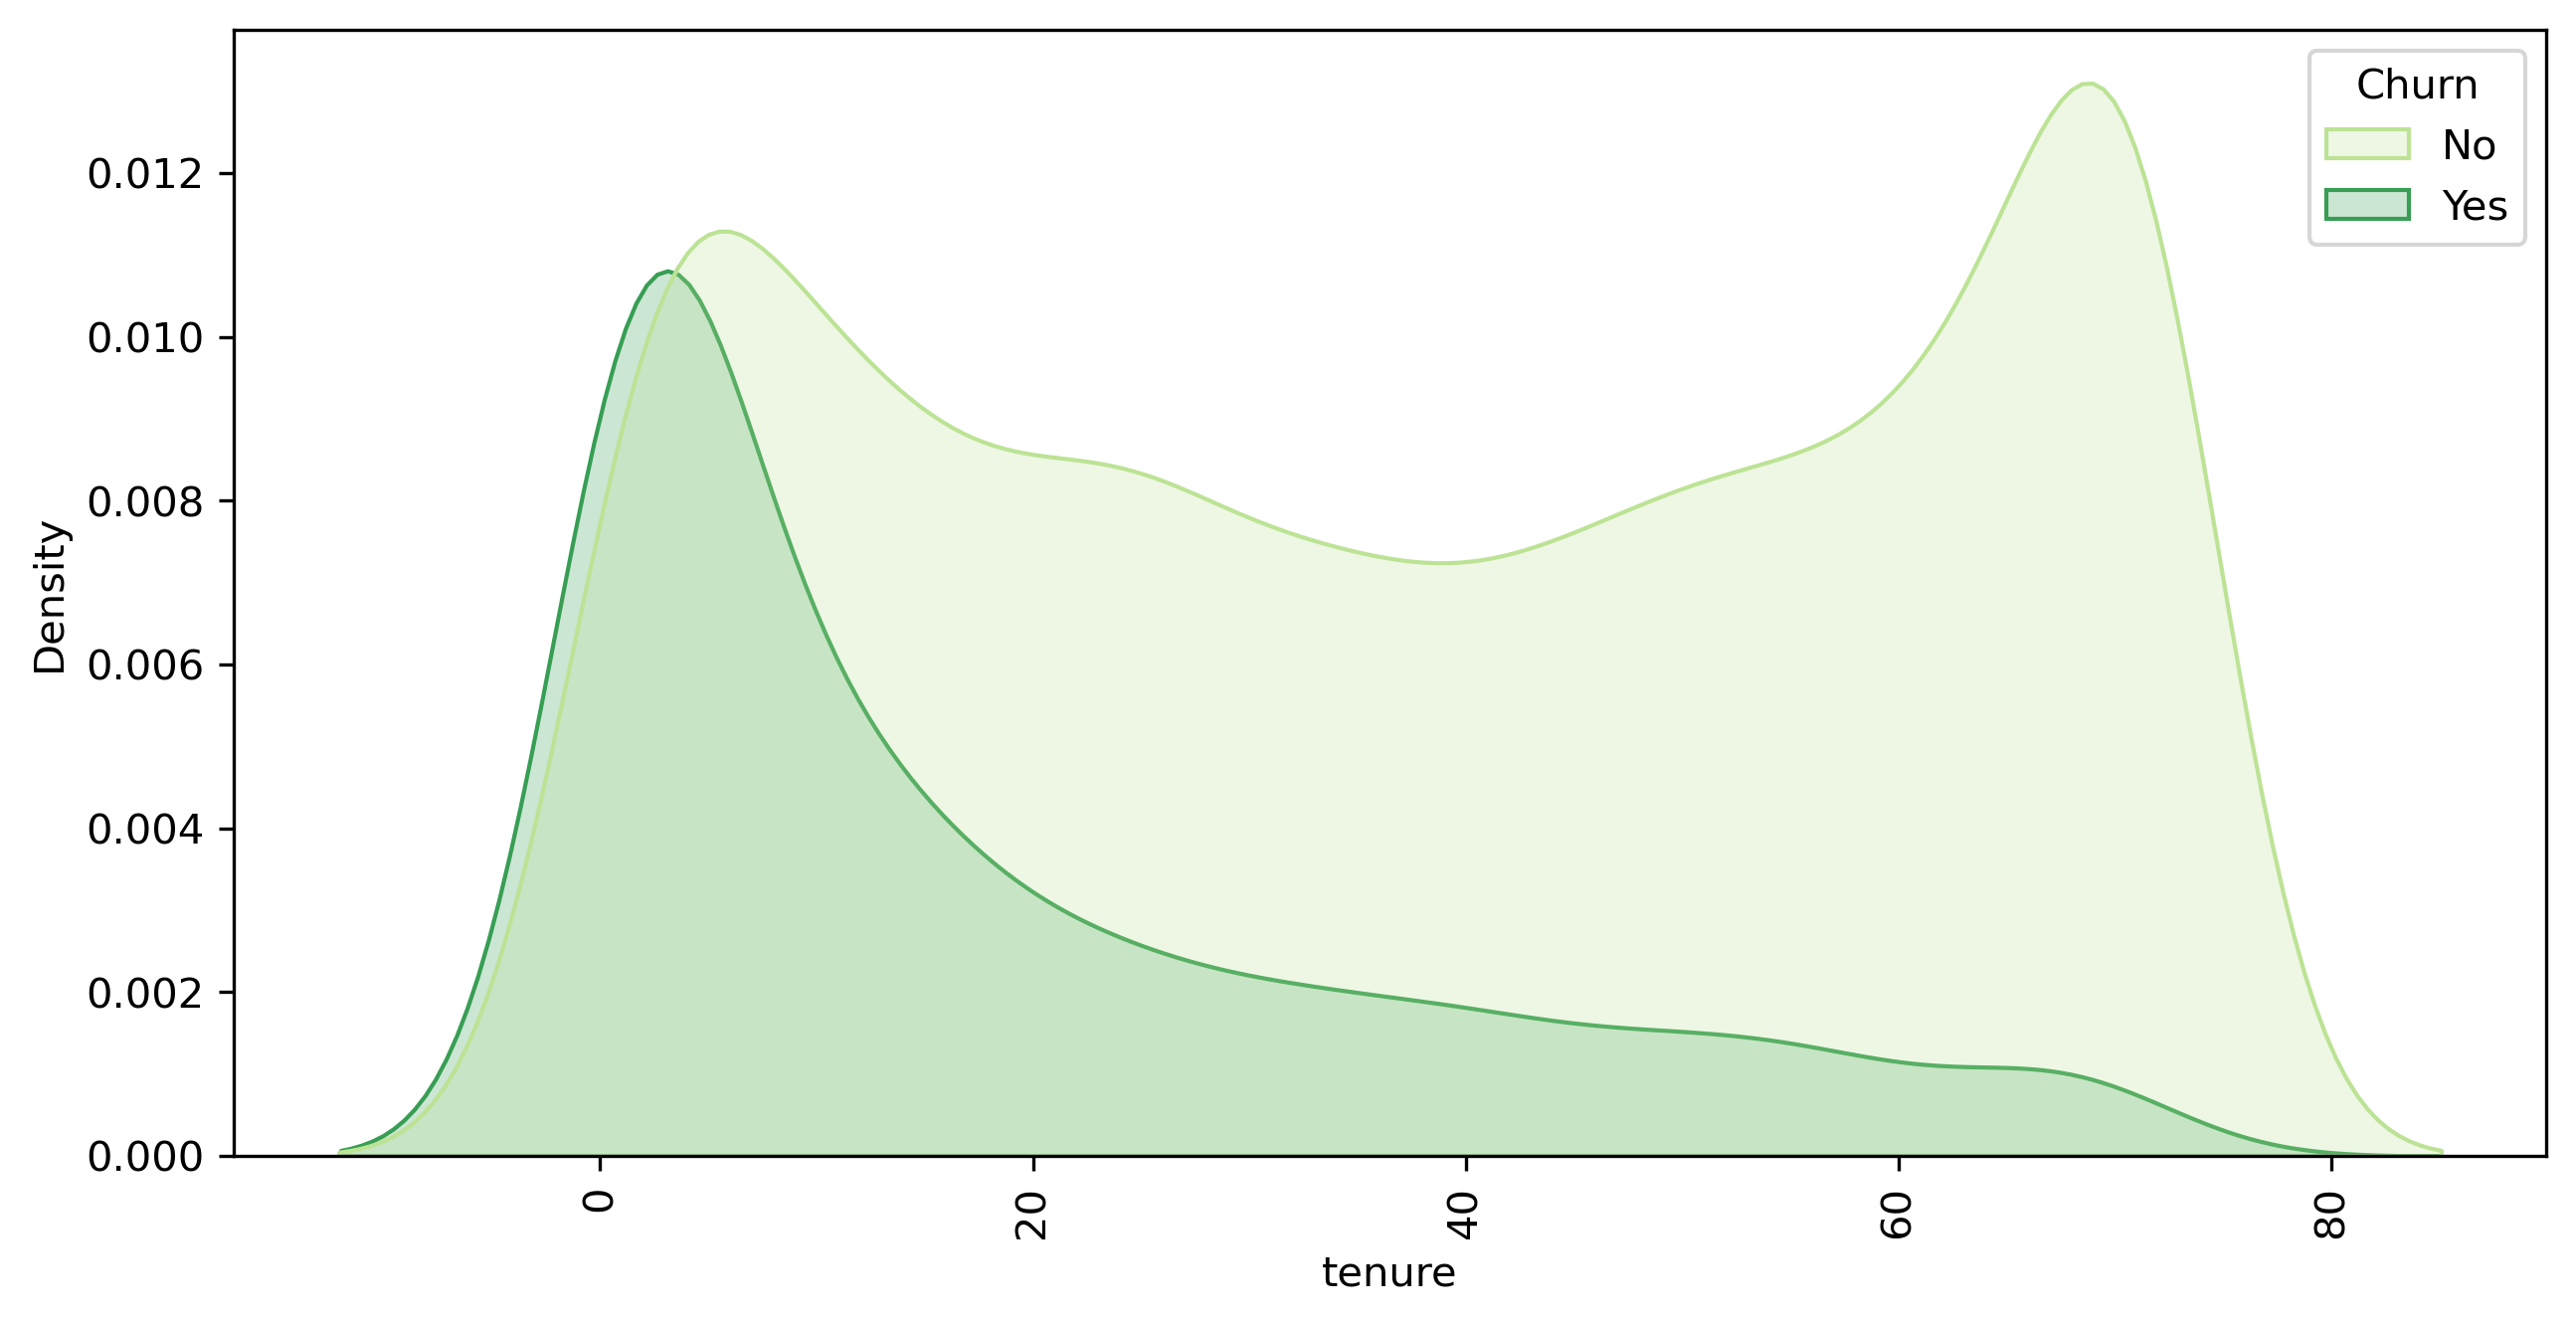

In [16]:
plt.figure(figsize=(10,5),dpi=300)
sns.kdeplot(data=df, x ='tenure',hue='Churn',fill=True,palette='YlGn')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

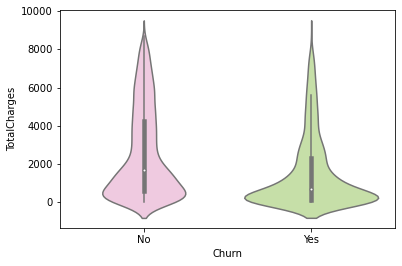

In [17]:
sns.violinplot(data=df,x='Churn',y='TotalCharges',palette='PiYG')

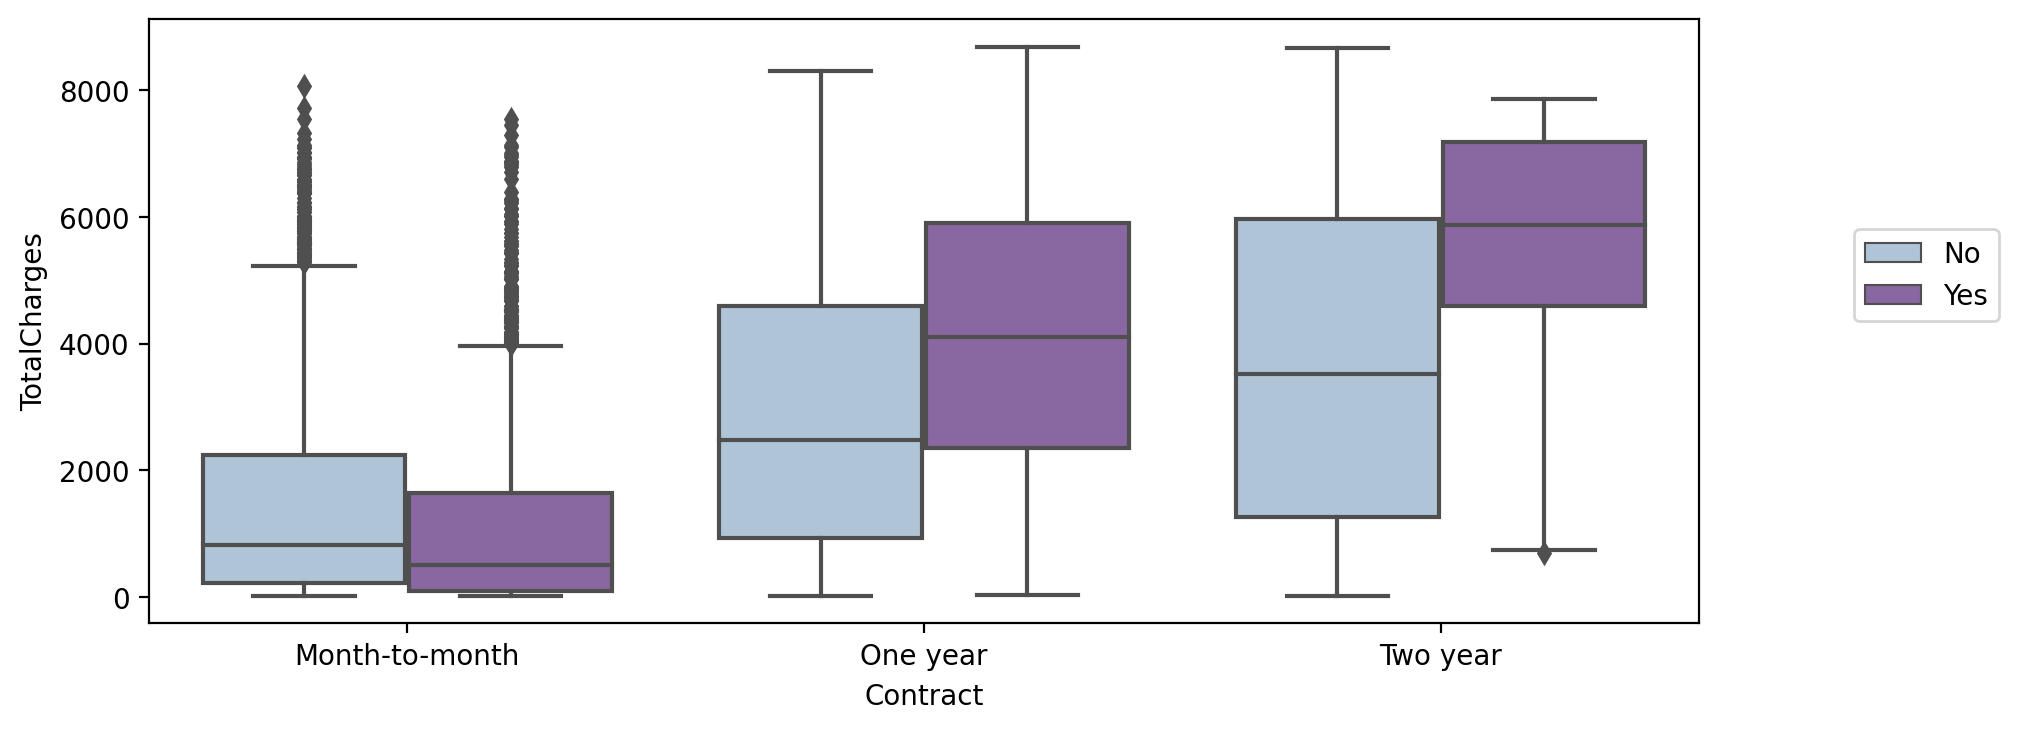

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn',palette='BuPu')
plt.legend(loc=(1.1,0.5))

In [19]:
object_type = df.select_dtypes(include='object')

In [20]:
no_type = df.select_dtypes(exclude='object')

In [21]:
object_type = object_type.drop('customerID',axis=1)

In [22]:
object_type = pd.get_dummies(object_type)

In [23]:
no_type

tenure  MonthlyCharges  TotalCharges
0          1           29.85         29.85
1         34           56.95       1889.50
2          2           53.85        108.15
3         45           42.30       1840.75
4          2           70.70        151.65
...      ...             ...           ...
7027      24           84.80       1990.50
7028      72          103.20       7362.90
7029      11           29.60        346.45
7030       4           74.40        306.60
7031      66          105.65       6844.50

[7032 rows x 3 columns]

In [24]:
dfo = pd.concat([object_type,no_type],axis=1)

In [25]:
dfo

gender_Female  gender_Male  SeniorCitizen_0  SeniorCitizen_1  \
0                 1            0                1                0   
1                 0            1                1                0   
2                 0            1                1                0   
3                 0            1                1                0   
4                 1            0                1                0   
...             ...          ...              ...              ...   
7027              0            1                1                0   
7028              1            0                1                0   
7029              1            0                1                0   
7030              0            1                0                1   
7031              0            1                1                0   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0              0            1              1               0                1   
1              1            0              1               0                0   
2              1            0              1               0                0   
3              1            0              1               0                1   
4              1            0              1               0                0   
...          ...          ...            ...             ...              ...   
7027           0            1              0               1                0   
7028           0            1              0               1                0   
7029           0            1              0               1                1   
7030           0            1              1               0                0   
7031           1            0              1               0                0   

      PhoneService_Yes  ...  PaperlessBilling_Yes  \
0                    0  ...                     1   
1                    1  ...                     0   
2                    1  ...                     1   
3                    0  ...                     0   
4                    1  ...                     1   
...                ...  ...                   ...   
7027                 1  ...                     1   
7028                 1  ...                     1   
7029                 0  ...                     1   
7030                 1  ...                     1   
7031                 1  ...                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0   
7028                                        0   
7029                                        0   
7030                                        0   
7031                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7027                                      0                               0   
7028                                      1                               0   
7029                                      0                               1   
7030                                      0                               0   
7031                                      0                               0   

      PaymentMeth

In [26]:
corr_df = dfo.corr().transpose()

In [27]:
corr_df['Churn_Yes'].sort_values()[1:-1]

tenure                                    -0.354049
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
SeniorCitizen_0                           -0.150541
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMetho

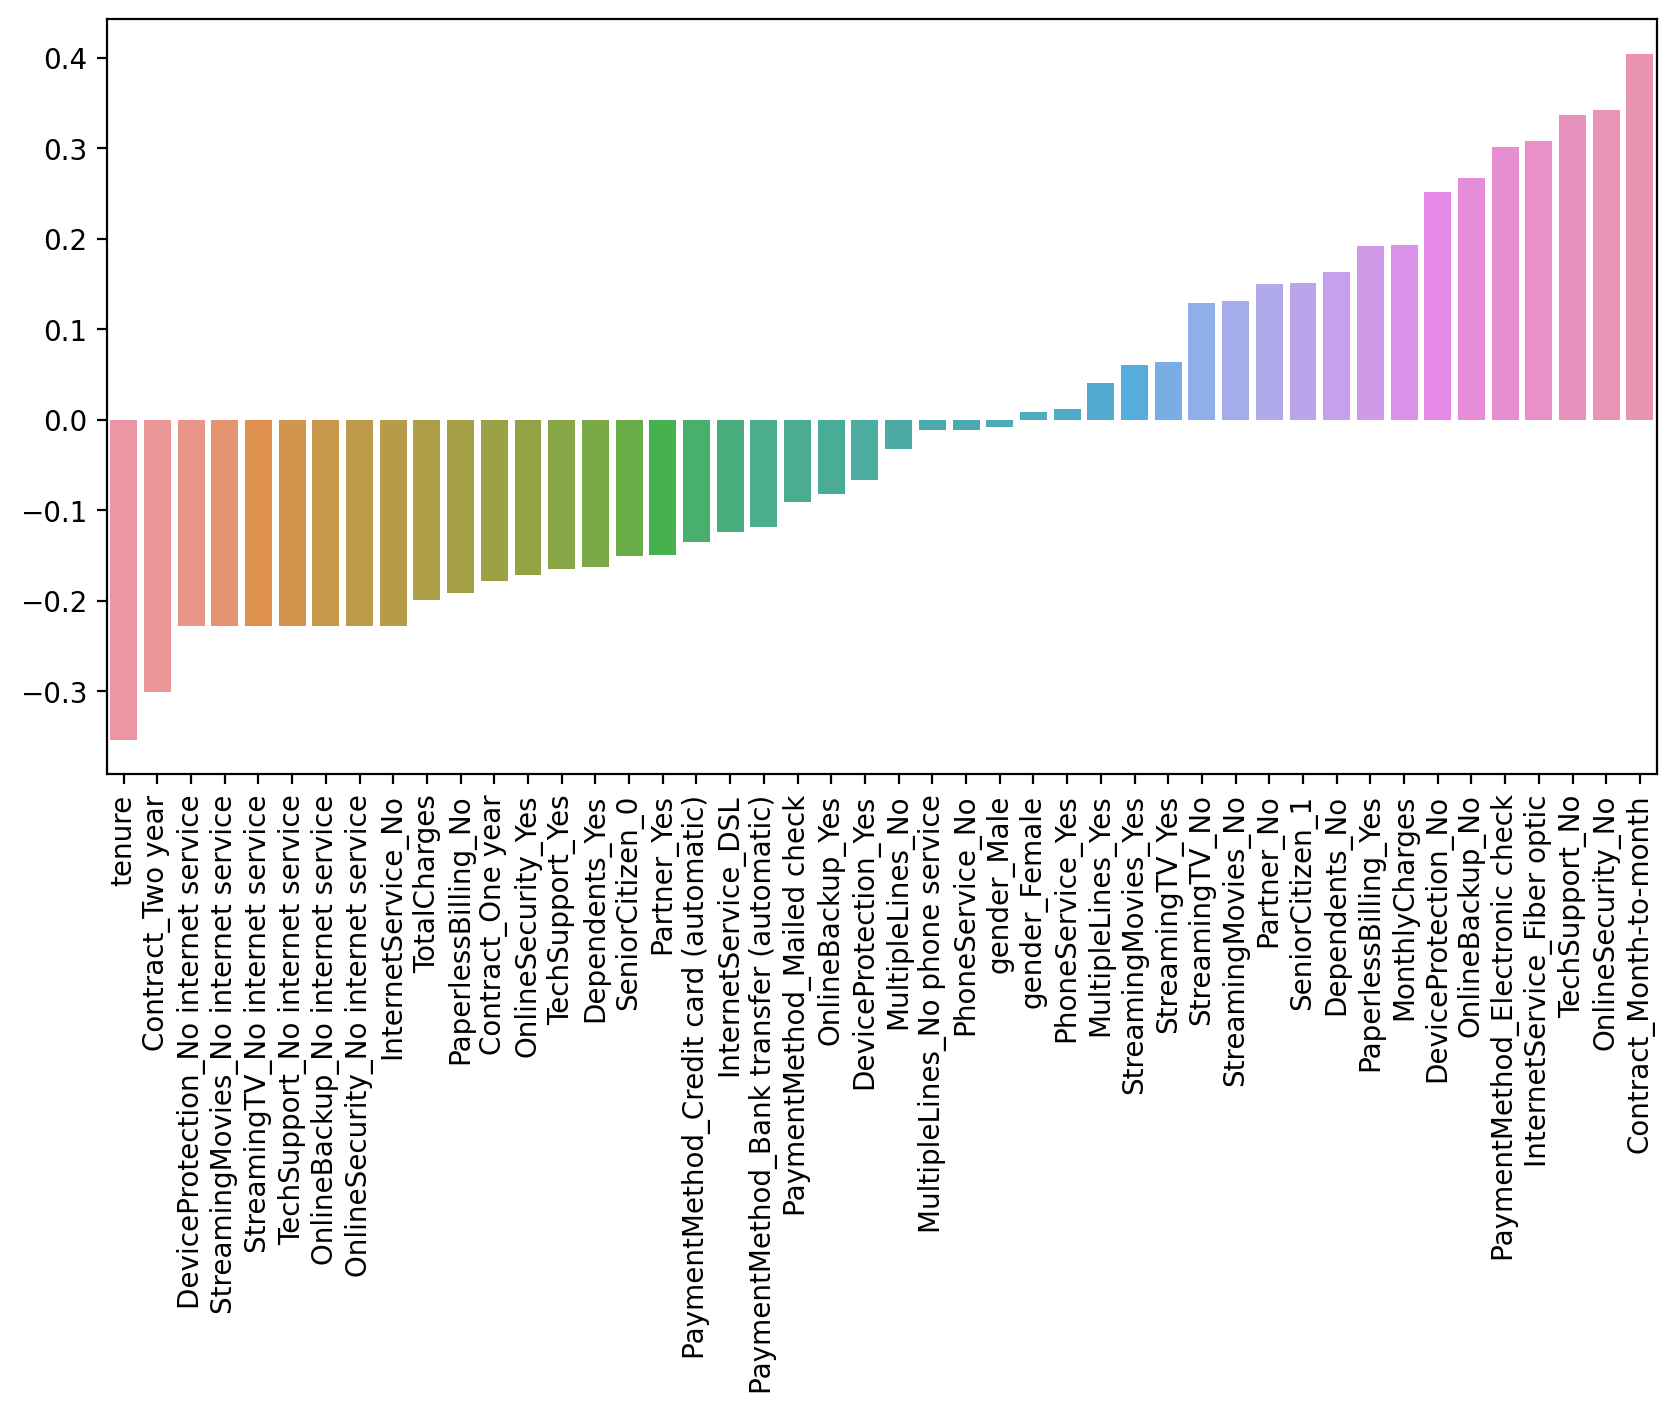

In [28]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values()[1:-1].index,y=corr_df['Churn_Yes'].sort_values()[1:-1].values)
plt.xticks(rotation=90);

In [29]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

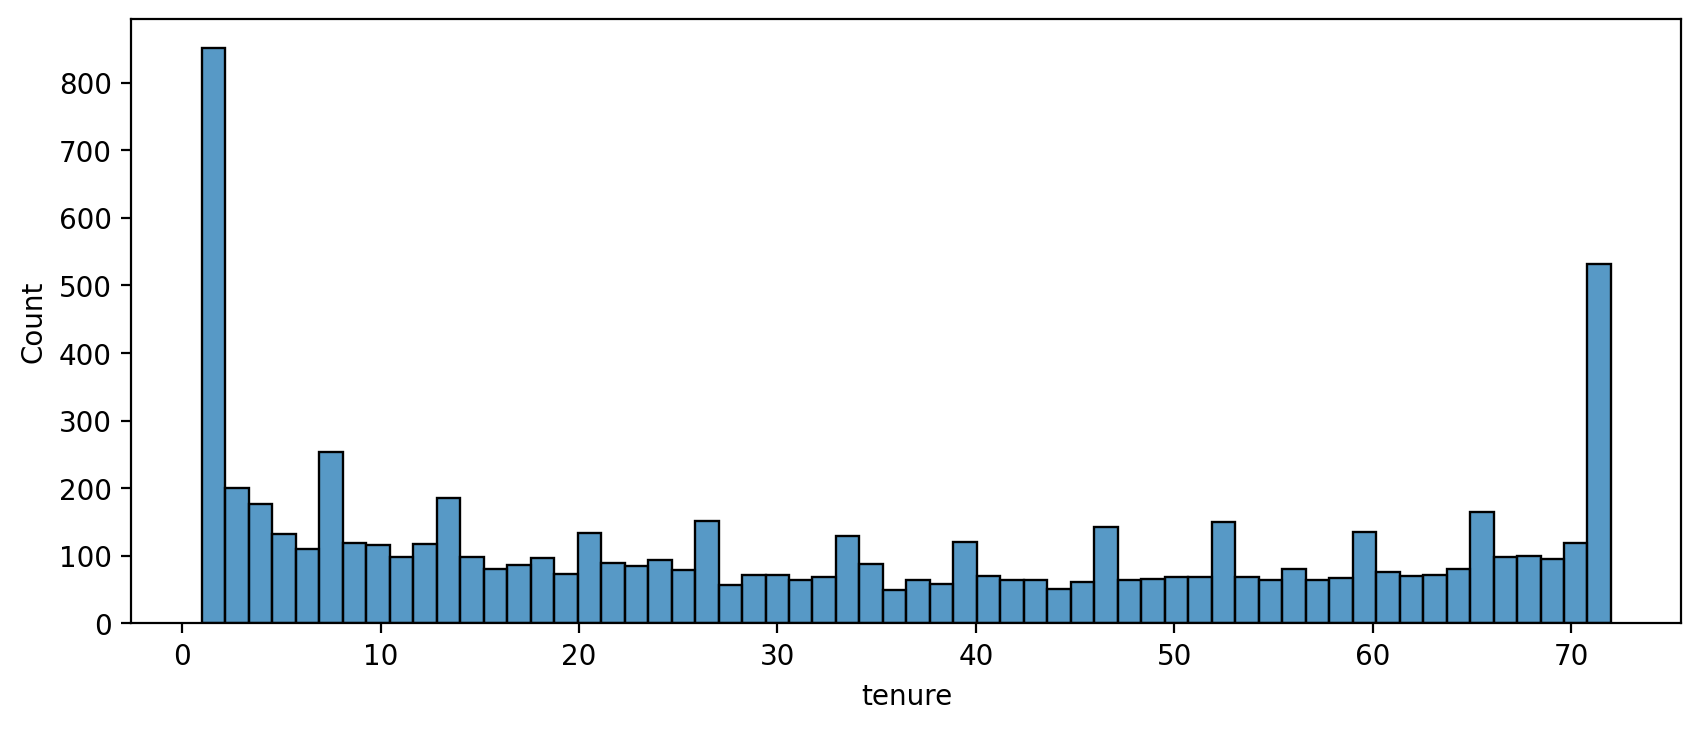

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df ,x='tenure',bins=60);

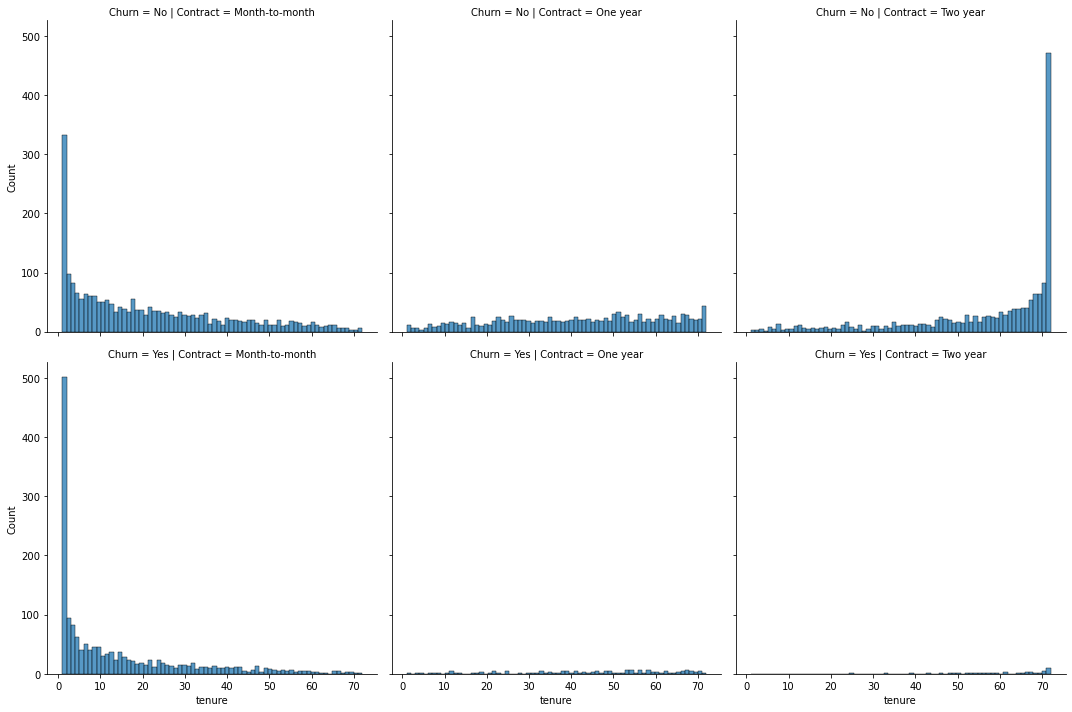

In [31]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

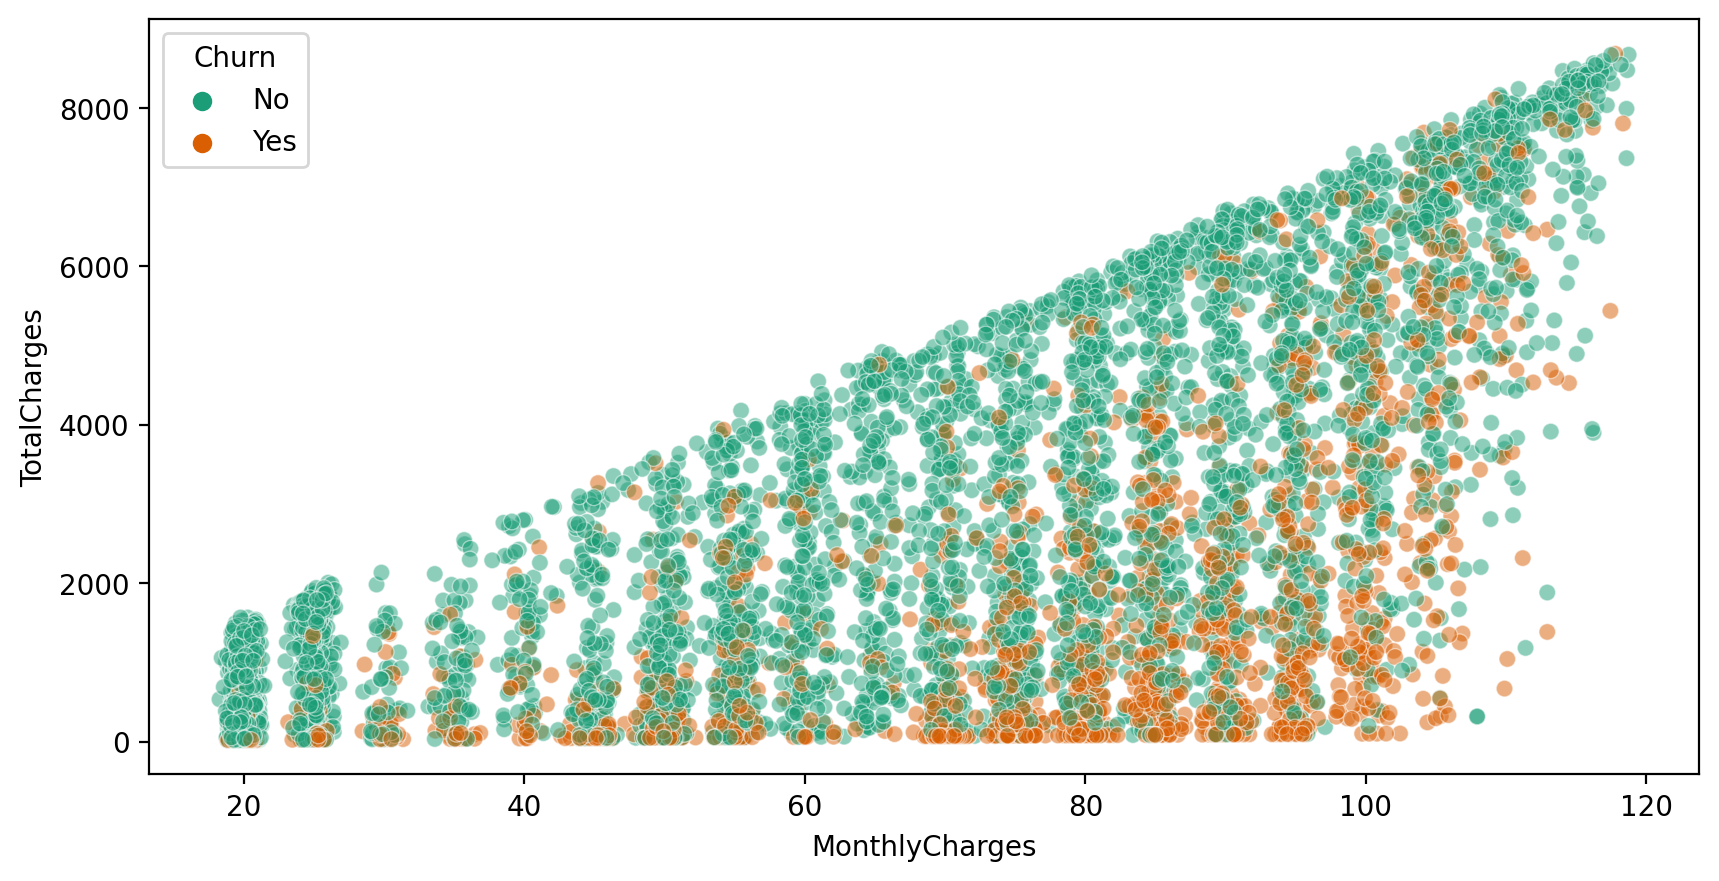

In [32]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',palette='Dark2',alpha=0.5);

### Churn Rate Percentage and Visualization

In [33]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [34]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [35]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [36]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

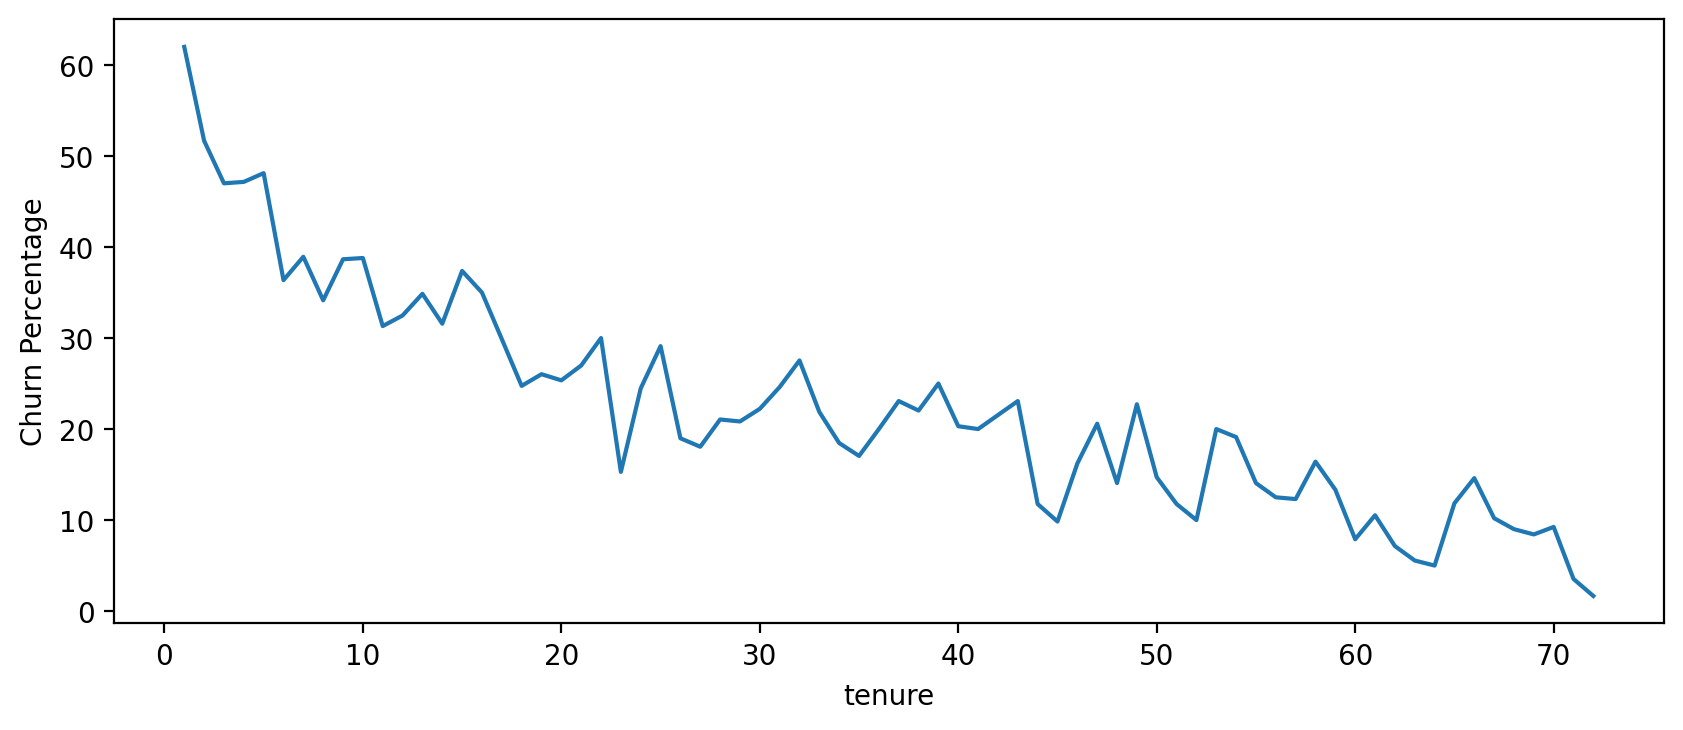

In [37]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.transpose()['customerID'].plot()
plt.ylabel('Churn Percentage');

In [38]:
def cohort(tenure):
    if tenure >= 0 and tenure <=12:
        return '0-12 Months'
    elif tenure >12 and tenure <= 24:
        return '12-24 Months'
    elif tenure> 24 and tenure <= 48:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [39]:
df['tenure cohort'] = df['tenure'].apply(cohort)

In [40]:
df[['tenure cohort','tenure']].head()

tenure cohort  tenure
0   0-12 Months       1
1  24-48 Months      34
2   0-12 Months       2
3  24-48 Months      45
4   0-12 Months       2

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

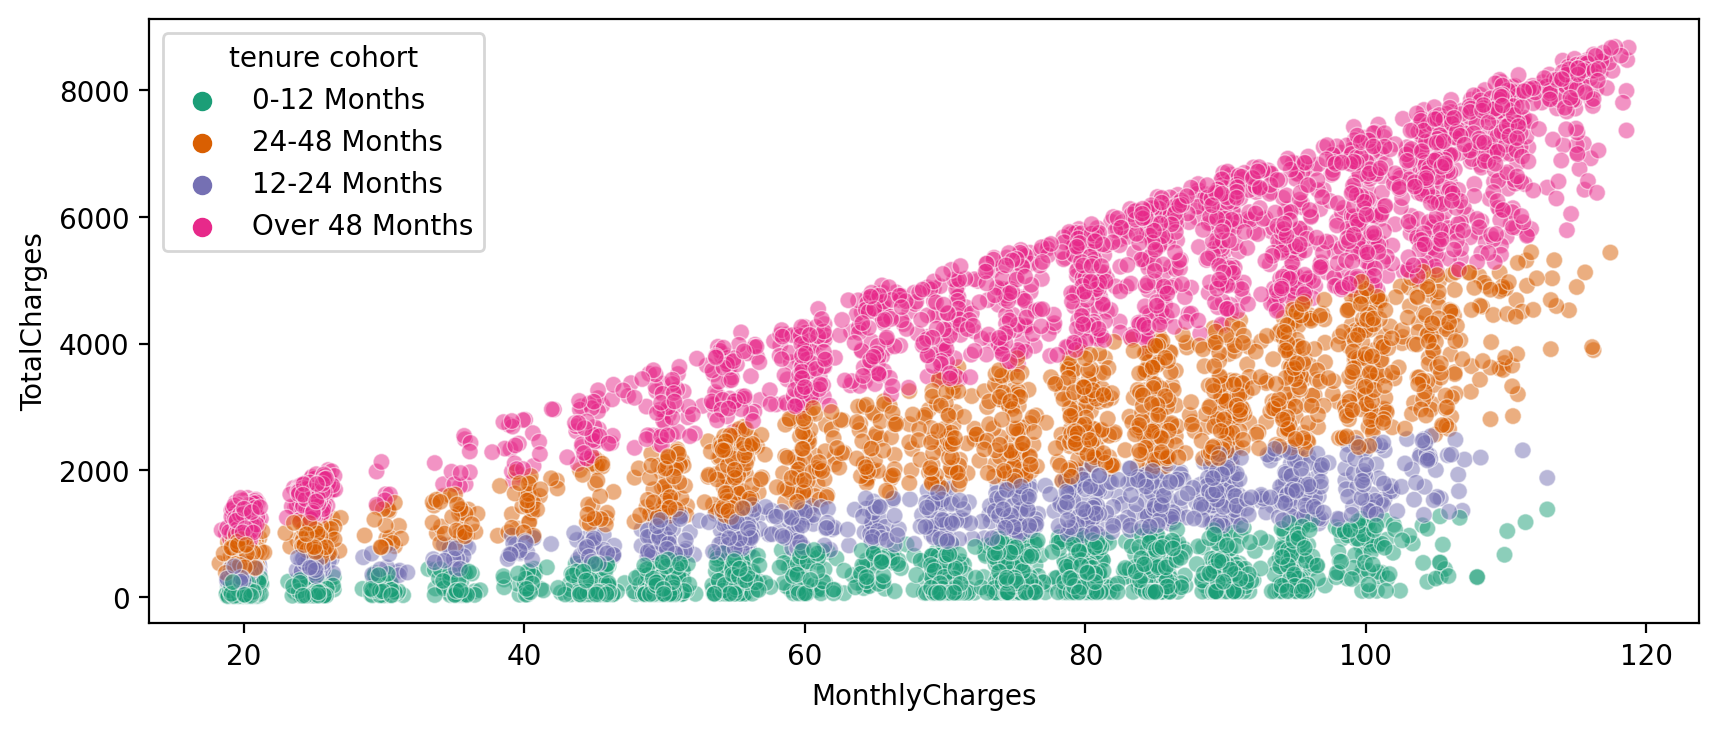

In [41]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y= 'TotalCharges',hue='tenure cohort',alpha=0.5,palette='Dark2')

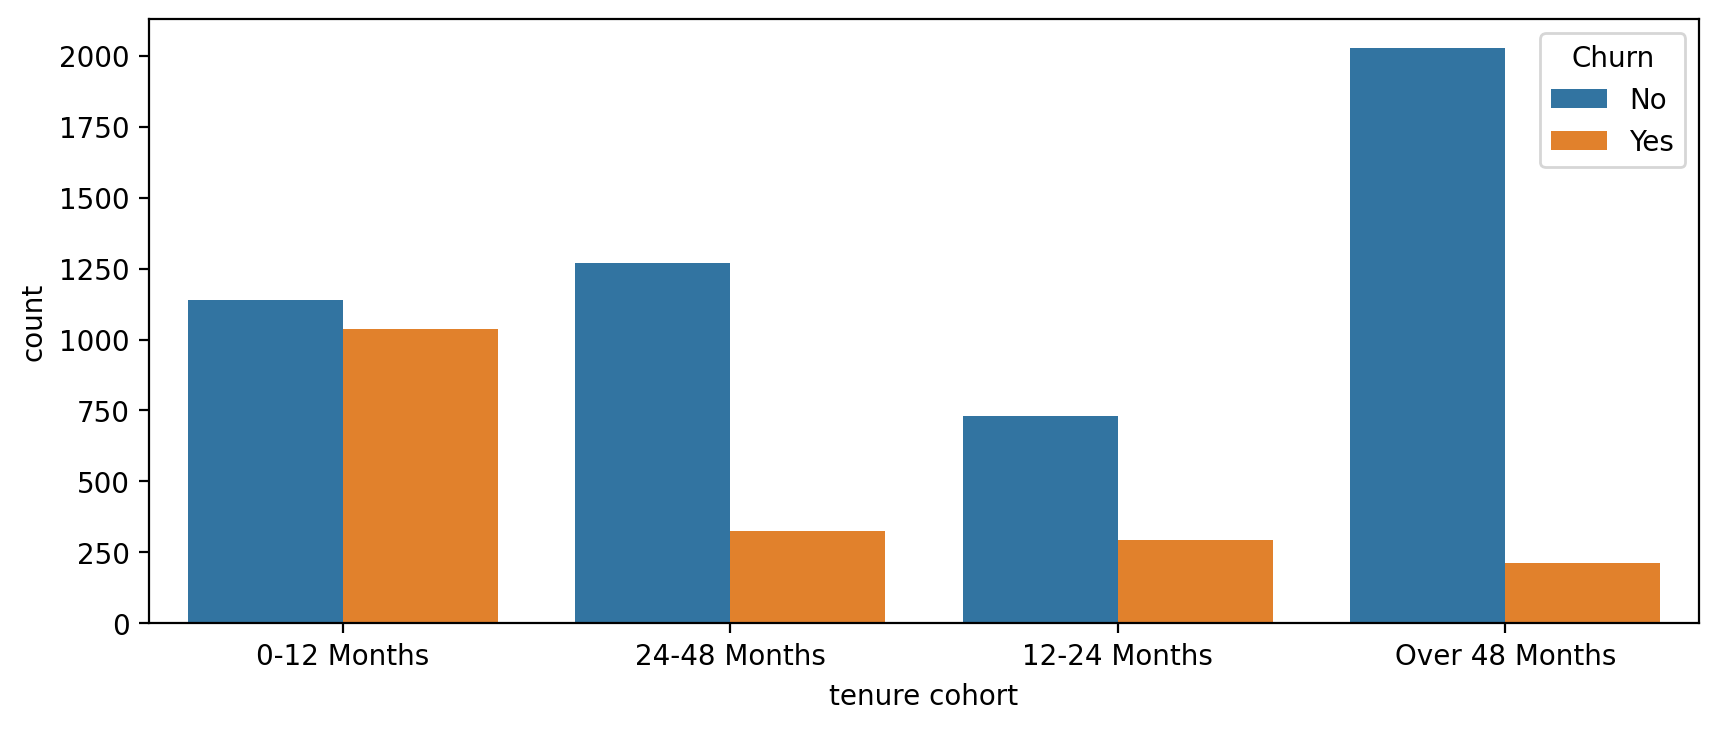

In [42]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='tenure cohort',hue='Churn');

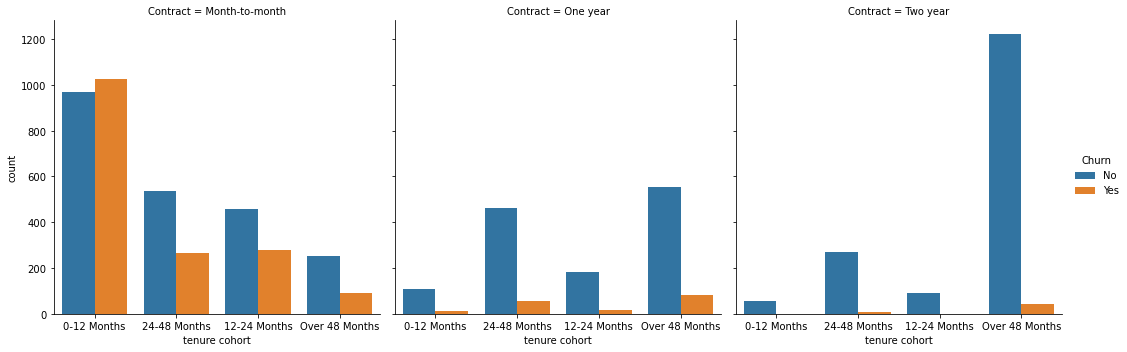

In [43]:
sns.catplot(data=df,x='tenure cohort',hue='Churn',col='Contract',kind='count');

## Sklearn Imports 

-----------------

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

### Feature Selection

In [45]:
X = dfo.drop(['Churn_Yes','Churn_No'],axis=1)

In [46]:
y = dfo['Churn_Yes']

### Train | Test Split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101)

### Decision Tree Classifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_dt_pre = dt.predict(X_test)

In [51]:
print(classification_report(y_dt_pre,y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1031
           1       0.48      0.45      0.47       376

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



.

### **Note: Here Churn_yes is shown in Confusion Matris so 0 means Not Churn 1 means churn

.

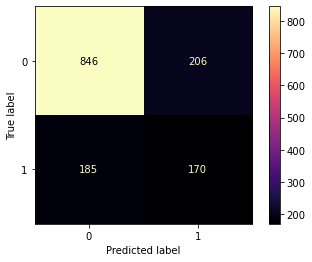

In [52]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test,cmap='magma');

### Just to know the importance of diffirent Features

.

In [53]:
dt.feature_importances_

array([1.60202852e-02, 1.52296140e-02, 1.23414755e-02, 5.61585975e-03,
       9.27801325e-03, 1.10115257e-02, 1.14718379e-02, 1.53839350e-02,
       1.66439932e-04, 9.05714649e-04, 6.18362922e-03, 3.87903796e-03,
       8.18306549e-03, 6.80890630e-04, 4.90840436e-02, 0.00000000e+00,
       1.21382449e-02, 0.00000000e+00, 1.13232920e-02, 8.44598541e-03,
       0.00000000e+00, 9.31214375e-03, 9.91641228e-03, 0.00000000e+00,
       7.10015269e-03, 1.19857281e-02, 0.00000000e+00, 7.81204548e-03,
       4.38831586e-03, 0.00000000e+00, 1.13581564e-02, 2.76478502e-03,
       0.00000000e+00, 6.32539496e-03, 1.69938640e-01, 4.32650372e-03,
       5.64572572e-04, 8.86440706e-03, 1.14730939e-02, 6.13059648e-03,
       9.08191093e-03, 1.77050320e-02, 1.04987620e-02, 1.21709223e-01,
       1.78412824e-01, 1.92988408e-01])

In [54]:
imp_fea = pd.DataFrame(index=X.columns,data=dt.feature_importances_,columns=['importance'])

In [55]:
imp_fea = imp_fea.sort_values('importance')

In [56]:
imp_fea = imp_fea[imp_fea['importance']>0.001]

In [57]:
imp_fea

importance
StreamingMovies_No                         0.002765
MultipleLines_No phone service             0.003879
Contract_One year                          0.004327
StreamingTV_No                             0.004388
SeniorCitizen_1                            0.005616
PaymentMethod_Bank transfer (automatic)    0.006131
MultipleLines_No                           0.006184
StreamingMovies_Yes                        0.006325
DeviceProtection_Yes                       0.007100
TechSupport_Yes                            0.007812
MultipleLines_Yes                          0.008183
OnlineBackup_No                            0.008446
PaperlessBilling_No                        0.008864
PaymentMethod_Credit card (automatic)      0.009082
Partner_No                                 0.009278
OnlineBackup_Yes                           0.009312
DeviceProtection_No                        0.009916
PaymentMethod_Mailed check                 0.010499
Partner_Yes                                0.011012
OnlineSecurity_Yes                         0.011323
StreamingTV_Yes                            0.011358
Dependents_No                              0.011472
PaperlessBilling_Yes                       0.011473
TechSupport_No                             0.011986
OnlineSecurity_No                          0.012138
SeniorCitizen_0                            0.012341
gender_Male                                0.015230
Dependents_Yes                             0.015384
gender_Female                              0.016020
PaymentMethod_Electronic check             0.017705
InternetService_Fiber optic                0.049084
tenure                                     0.121709
Contract_Month-to-month                    0.169939
MonthlyCharges                             0.178413
TotalCharges                               0.192988

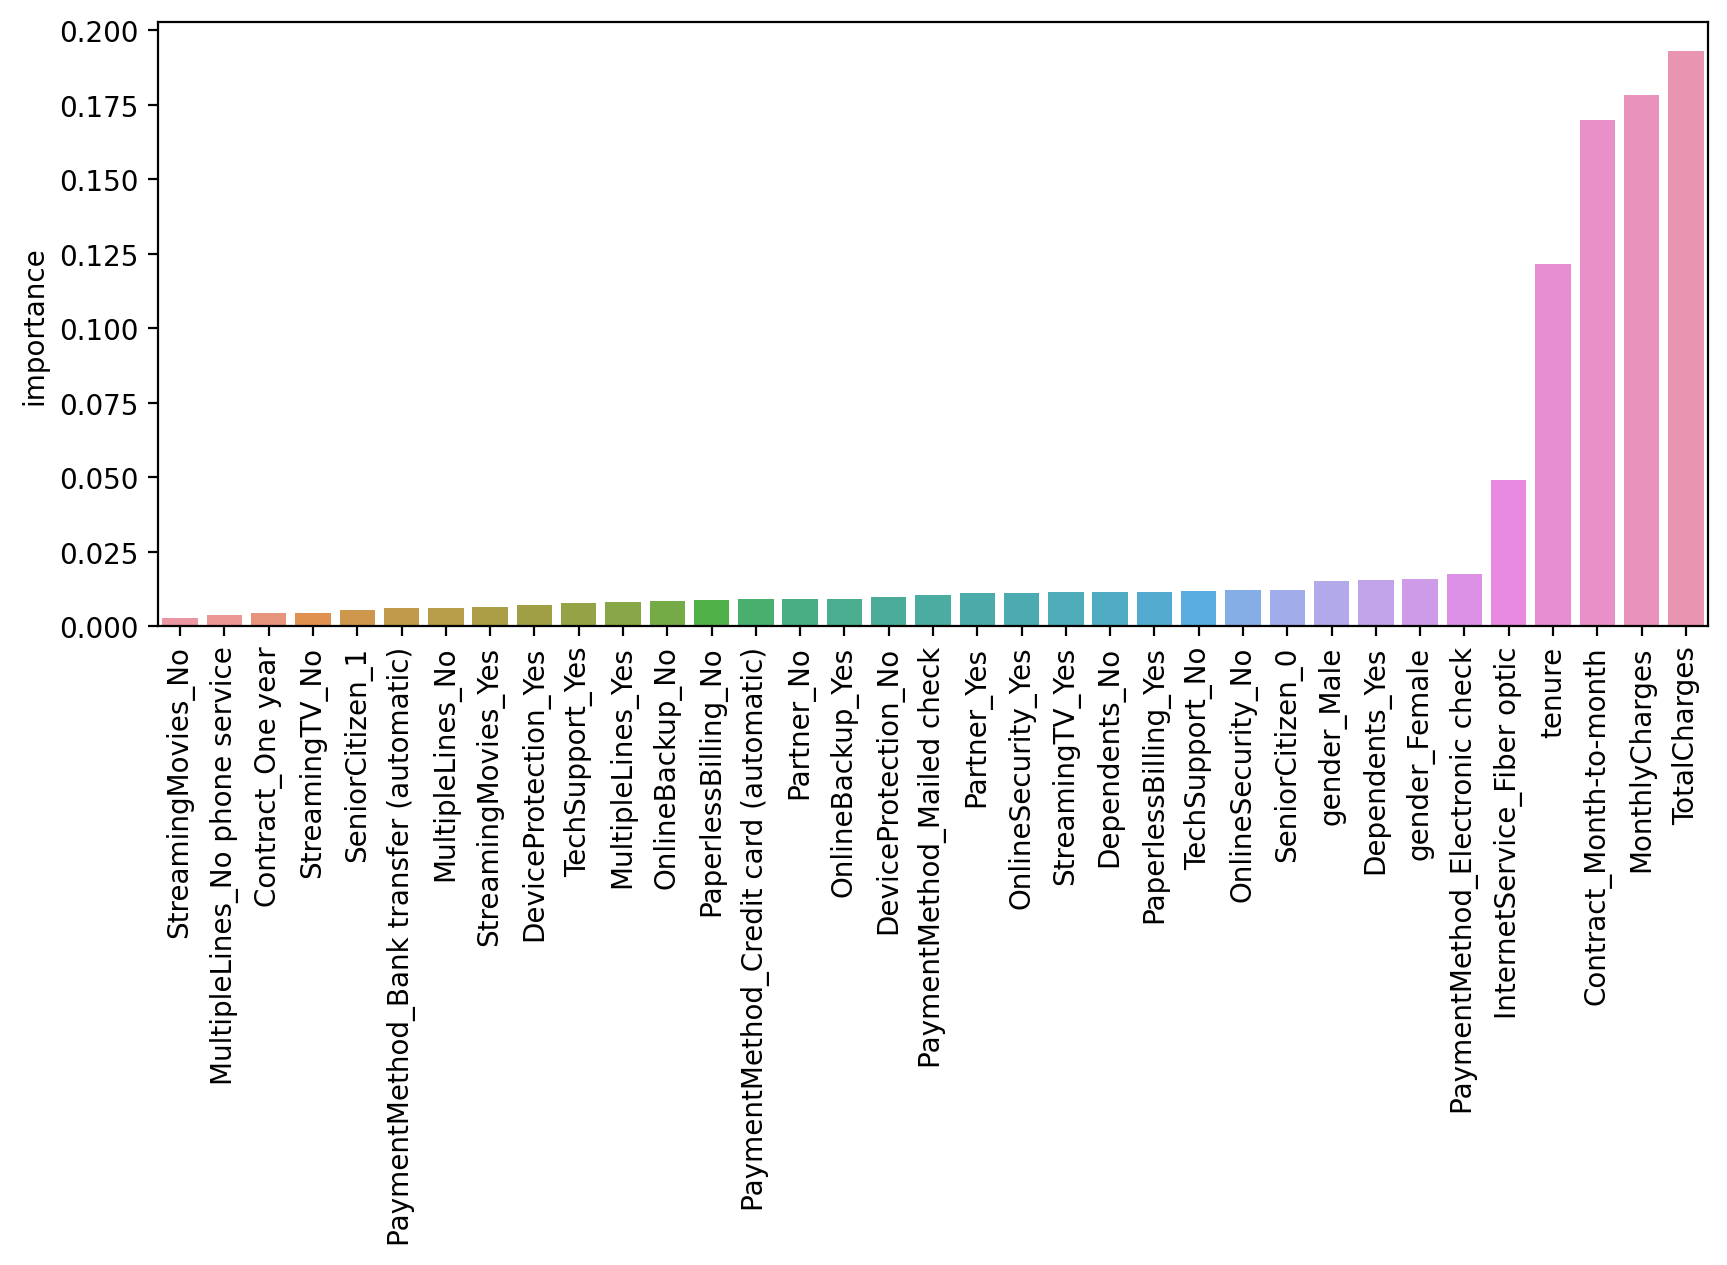

In [58]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=imp_fea,x=imp_fea.index,y='importance')
plt.xticks(rotation = 90);

### Random  Forest  Classifier

In [59]:
rf = RandomForestClassifier()

In [60]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
rf_pre = rf.predict(X_test)

In [62]:
print(classification_report(rf_pre,y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1108
           1       0.51      0.60      0.55       299

    accuracy                           0.79      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.81      0.79      0.80      1407



.

### **Note: Here Churn_yes is shown in Confusion Matris so 0 means Not Churn 1 means churn

.

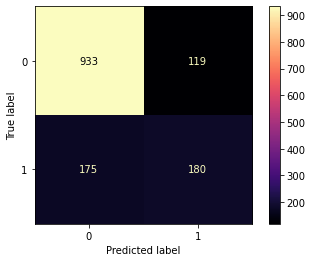

In [63]:
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test,cmap='magma');

### Ada Boost Classifier

In [64]:
ad = AdaBoostClassifier()

In [65]:
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [66]:
ad_pre = ad.predict(X_test)

.

### **Note: Here Churn_yes is shown in Confusion Matris so 0 means Not Churn 1 means churn

.

In [67]:
print(classification_report(ad_pre,y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1126
           1       0.52      0.66      0.58       281

    accuracy                           0.81      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.83      0.81      0.82      1407



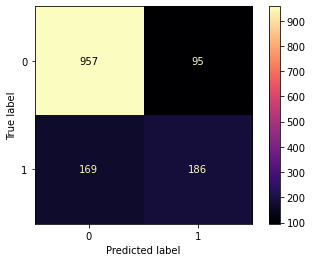

In [68]:
ConfusionMatrixDisplay.from_estimator(ad,X_test,y_test,cmap='magma');

### Gradient Boosting Classifier

In [69]:
gb = GradientBoostingClassifier()

In [70]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [71]:
gb_pre = gb.predict(X_test) 

In [72]:
print(classification_report(gb_pre,y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1124
           1       0.52      0.65      0.58       283

    accuracy                           0.81      1407
   macro avg       0.71      0.75      0.73      1407
weighted avg       0.83      0.81      0.82      1407



.

### **Note: Here Churn_yes is shown in Confusion Matris so 0 means Not Churn 1 means churn

.

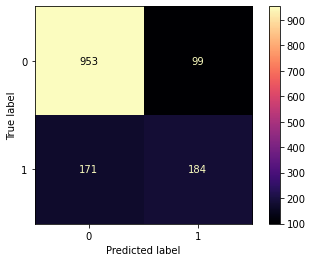

In [73]:
ConfusionMatrixDisplay.from_estimator(gb,X_test,y_test,cmap='magma')

----------

### Grid Seach for Random Forest

In [74]:
param_grid = {'n_estimators':[128,200,300],
              'max_depth':[9],
              'min_samples_split':[6,7],
              'max_features':['log2']}

In [75]:
grid = GridSearchCV(rf,param_grid=param_grid ,cv=10 )

In [76]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9], 'max_features': ['log2'],
                         'min_samples_split': [6, 7],
                         'n_estimators': [128, 200, 300]})

In [77]:
grid.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 7,
 'n_estimators': 200}

In [78]:
pre= grid.predict(X_test)

In [79]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1135
           1       0.52      0.68      0.59       272

    accuracy                           0.82      1407
   macro avg       0.72      0.77      0.74      1407
weighted avg       0.84      0.82      0.83      1407



.

### **Note: Here Churn_yes is shown in Confusion Matris so 0 means Not Churn 1 means churn

.

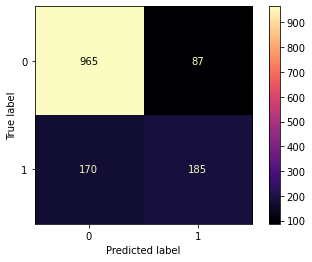

In [80]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test,cmap='magma')

# Either Grid Seach for Random Forest or Ada Boost Classifier is best Fit

.

# jobe done!

------------